In [1]:
#imports
import os
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.linear_model as skl
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import matplotlib 
matplotlib.rcParams['text.usetex']=True
import matplotlib.pyplot as plt
from sklearn.utils import resample
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, seed
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

#newer imports
from random import random, seed
from sklearn.linear_model import SGDRegressor
from matplotlib import cm
import seaborn as sns

# Calculates value of Franke function
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

# Creates design matrix
def create_X(x, y, n ):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X

# Calculates R²-score
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

# Calculates mean squared error
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

# SGD #

* N = 40 and degree = 20 is implemented since these were seen in the previous project as the optimal values for lowest MSE score and highest $R_{2}$ obtainable. For this reason, I implemented the following such that comparisons can be made.
* SGD with momentum is implemented. $\gamma$ is set to 0.5, indicating momentum. 

# OLS #

### OLS, Grid Search for optimal $R_{2}$: Minibatch Size & Epochs (1/2) ###

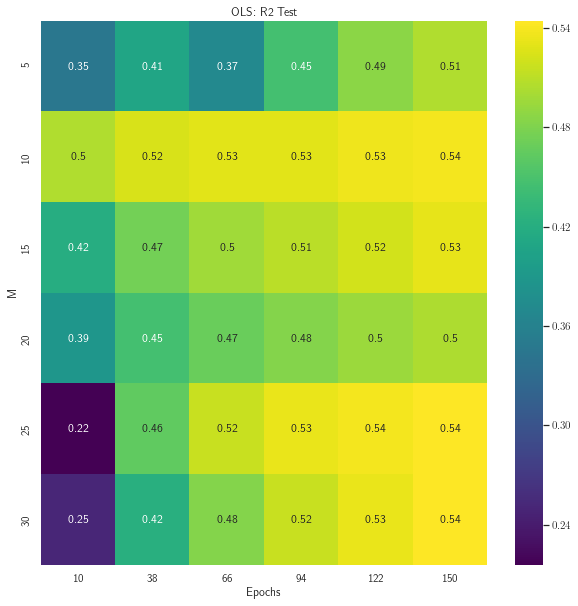

In [5]:
sns.set()

np.random.seed(3155)
N = 40
maxdegree = 20

ax_row = np.random.uniform(0, 1, size=N); ax_col = np.random.uniform(0, 1, size=N)
ind_sort_row = np.argsort(ax_row); ind_sort_col = np.argsort(ax_col)
ax_row_sorted = ax_row[ind_sort_row]; ax_col_sorted = ax_col[ind_sort_col]
x = np.sort(np.random.uniform(0, 1, N)); y = np.sort(np.random.uniform(0, 1, N))
mx, my = np.meshgrid(x, y); colmat, rowmat = np.meshgrid(ax_col_sorted, ax_row_sorted)
noise_str = 0.2; noise = np.random.randn(N, N)
z = FrankeFunction(colmat, rowmat) + noise_str * noise; #z = FrankeFunction(mx, my) + noise_str * noise
z = z.ravel() 

#design matrix
X = create_X(colmat, rowmat, n=maxdegree)
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)
X_train_mean = np.mean(X_train, axis=0); z_train_mean = np.mean(z_train, axis=0)
X_train -= X_train_mean; X_test -= X_train_mean; z_train -= z_train_mean; z_test -= z_train_mean

gamma = 0.0
data_indices = np.arange(X_train.shape[0])

M = np.linspace(5,30,6, dtype=int)
epochs = np.linspace(10,150,6, dtype=int)
R2_all = np.zeros((len(M), len(epochs)))

t0, t1 = 5, 5

def learning_schedule(t):
    return t0/(t+t1)

for i in range(len(M)):
    
    m = int(X_train.shape[0]/M[i])
    prev_grad = np.zeros(X_train.shape[1])
    OLS_theta = np.random.randn(X_train.shape[1])
      
    for j in range(len(epochs)):
        
        eta = 0.2
        
        for epoch in range(epochs[j]):
            for k in range(m): 

                eta = learning_schedule(epoch*m+k)
                
                chosen_datapoints = np.random.choice(data_indices, size=M[i], replace=False)

                xi = X_train[chosen_datapoints]
                zi = z_train[chosen_datapoints]
        
                #OLS
                OLS_gradients = (2.0/M[i]) * xi.T @ ((xi @ OLS_theta)-zi)
        
                #with momentum 
                OLS_theta = OLS_theta - (gamma*prev_grad + eta*OLS_gradients)
                prev_grad = gamma*prev_grad + eta*OLS_gradients
        
        OLS_zpredict = X_test @ OLS_theta
        R2_all[i][j] = R2(z_test, OLS_zpredict)
  
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(R2_all, annot=True, ax=ax, cmap="viridis", xticklabels = epochs, yticklabels = M)
ax.set_title("OLS: R2 Test")
ax.set_ylabel("M")
ax.set_xlabel("Epochs")
plt.show()

### OLS, Grid Search for optimal MSE: Minibatch Size & Epochs (2/2) ###

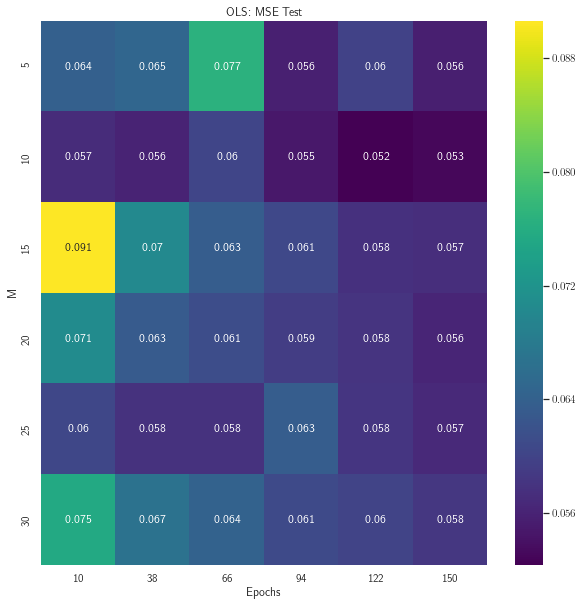

In [34]:
sns.set()

np.random.seed(3155)
N = 40
maxdegree = 20

ax_row = np.random.uniform(0, 1, size=N); ax_col = np.random.uniform(0, 1, size=N)
ind_sort_row = np.argsort(ax_row); ind_sort_col = np.argsort(ax_col)
ax_row_sorted = ax_row[ind_sort_row]; ax_col_sorted = ax_col[ind_sort_col]
x = np.sort(np.random.uniform(0, 1, N)); y = np.sort(np.random.uniform(0, 1, N))
mx, my = np.meshgrid(x, y); colmat, rowmat = np.meshgrid(ax_col_sorted, ax_row_sorted)
noise_str = 0.2; noise = np.random.randn(N, N)
z = FrankeFunction(colmat, rowmat) + noise_str * noise; #z = FrankeFunction(mx, my) + noise_str * noise
z = z.ravel() 

#design matrix
X = create_X(colmat, rowmat, n=maxdegree)
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)
X_train_mean = np.mean(X_train, axis=0); z_train_mean = np.mean(z_train, axis=0)
X_train -= X_train_mean; X_test -= X_train_mean; z_train -= z_train_mean; z_test -= z_train_mean

eta = 0.2
gamma = 0.0
data_indices = np.arange(X_train.shape[0])

M = np.linspace(5,30,6, dtype=int)
epochs = np.linspace(10,150,6, dtype=int)
MSE_all = np.zeros((len(M), len(epochs)))

#t0, t1 = 5, 50

#def learning_schedule(t):
#    return t0/(t+t1)

for i in range(len(M)):
    
    m = int(X_train.shape[0]/M[i])
    prev_grad = np.zeros(X_train.shape[1])
    OLS_theta = np.random.randn(X_train.shape[1])
    
    eta = 0.2
        
    for j in range(len(epochs)):
        
        for epoch in range(len(epochs)):
            for k in range(m): 
                
                #eta = learning_schedule(epoch*m+k)

                chosen_datapoints = np.random.choice(data_indices, size=M[i], replace=False)

                xi = X_train[chosen_datapoints]
                zi = z_train[chosen_datapoints]
        
                #OLS
                OLS_gradients = (2.0/M[i]) * xi.T @ ((xi @ OLS_theta)-zi)
        
                #with momentum 
                OLS_theta = OLS_theta - (gamma*prev_grad + eta*OLS_gradients)
                prev_grad = gamma*prev_grad + eta*OLS_gradients
        
        OLS_zpredict = X_test @ OLS_theta
        MSE_all[i][j] = MSE(z_test, OLS_zpredict)
  
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(MSE_all, annot=True, ax=ax, cmap="viridis", xticklabels = epochs, yticklabels = M)
ax.set_title("OLS: MSE Test")
ax.set_ylabel("M")
ax.set_xlabel("Epochs")
plt.show()

# Ridge #

### Ridge, Grid Search for optimal MSE: Minibatch Size & Epochs (1/2) ###

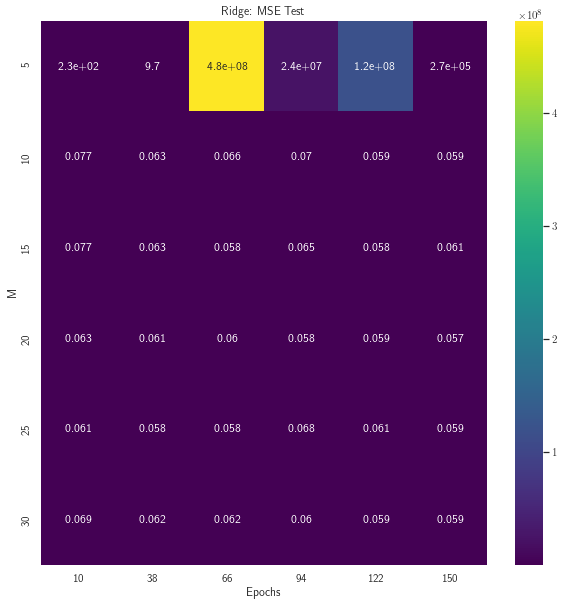

In [35]:
sns.set()

np.random.seed(3155)
N = 40
maxdegree = 20

ax_row = np.random.uniform(0, 1, size=N); ax_col = np.random.uniform(0, 1, size=N)
ind_sort_row = np.argsort(ax_row); ind_sort_col = np.argsort(ax_col)
ax_row_sorted = ax_row[ind_sort_row]; ax_col_sorted = ax_col[ind_sort_col]
x = np.sort(np.random.uniform(0, 1, N)); y = np.sort(np.random.uniform(0, 1, N))
mx, my = np.meshgrid(x, y); colmat, rowmat = np.meshgrid(ax_col_sorted, ax_row_sorted)
noise_str = 0.2; noise = np.random.randn(N, N)
z = FrankeFunction(colmat, rowmat) + noise_str * noise; #z = FrankeFunction(mx, my) + noise_str * noise
z = z.ravel() 

#design matrix
X = create_X(colmat, rowmat, n=maxdegree)
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)
X_train_mean = np.mean(X_train, axis=0); z_train_mean = np.mean(z_train, axis=0)
X_train -= X_train_mean; X_test -= X_train_mean; z_train -= z_train_mean; z_test -= z_train_mean

lmbd = 0.001
gamma = 0.5
data_indices = np.arange(X_train.shape[0])

M = np.linspace(5,30,6, dtype=int)
epochs = np.linspace(10,150,6, dtype=int)
MSE_all = np.zeros((len(M), len(epochs)))

#t0, t1 = 5, 50

#def learning_schedule(t):
#    return t0/(t+t1)

for i in range(len(M)):
    
    m = int(X_train.shape[0]/M[i])
    prev_grad_ridge = np.zeros(X_train.shape[1])
    Ridge_theta = np.random.randn(X_train.shape[1])
    
    eta = 0.2
        
    for j in range(len(epochs)):
        
        for epoch in range(len(epochs)):
            for k in range(m): 
                
                #eta = learning_schedule(epoch*m+k)

                chosen_datapoints = np.random.choice(data_indices, size=M[i], replace=False)

                xi = X_train[chosen_datapoints]
                zi = z_train[chosen_datapoints]
        
                Ridge_gradient = 2.0/M[i]*xi.T @ (xi @ (Ridge_theta)-zi)+2*lmbd*Ridge_theta
                Ridge_theta = Ridge_theta - (gamma*prev_grad_ridge + eta*Ridge_gradient)
                prev_grad_ridge = gamma*prev_grad_ridge + eta*Ridge_gradient
        
        Ridge_zpredict = X_test @ Ridge_theta
        MSE_all[i][j] = MSE(z_test, Ridge_zpredict)
  

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(MSE_all, annot=True, ax=ax, cmap="viridis", xticklabels = epochs, yticklabels = M)
ax.set_title("Ridge: MSE Test")
ax.set_ylabel("M")
ax.set_xlabel("Epochs")
plt.show()

#print('number of optimal epochs: ', epochs[9])
#print('optimal size of a minibatch: ', M[0])

### Ridge, Grid Search for optimal MSE: $\lambda$ & $\eta$ (2/2) ###

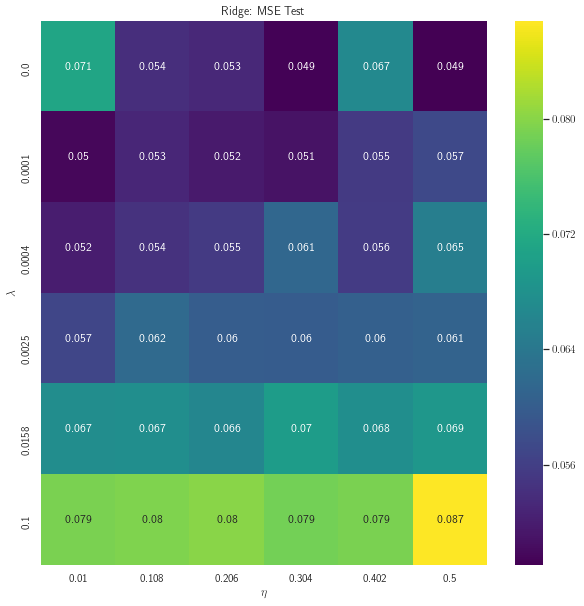

In [49]:
sns.set()

np.random.seed(3155)
N = 40
maxdegree = 20

ax_row = np.random.uniform(0, 1, size=N); ax_col = np.random.uniform(0, 1, size=N)
ind_sort_row = np.argsort(ax_row); ind_sort_col = np.argsort(ax_col)
ax_row_sorted = ax_row[ind_sort_row]; ax_col_sorted = ax_col[ind_sort_col]
x = np.sort(np.random.uniform(0, 1, N)); y = np.sort(np.random.uniform(0, 1, N))
mx, my = np.meshgrid(x, y); colmat, rowmat = np.meshgrid(ax_col_sorted, ax_row_sorted)
noise_str = 0.2; noise = np.random.randn(N, N)
z = FrankeFunction(colmat, rowmat) + noise_str * noise; #z = FrankeFunction(mx, my) + noise_str * noise
z = z.ravel() 

#design matrix
X = create_X(colmat, rowmat, n=maxdegree)
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)
X_train_mean = np.mean(X_train, axis=0); z_train_mean = np.mean(z_train, axis=0)
X_train -= X_train_mean; X_test -= X_train_mean; z_train -= z_train_mean; z_test -= z_train_mean

n_epochs = 150
M = 20
m = int(X_train.shape[0]/M)
gamma = 0.0

#lmdb = np.logspace(-5,-3,6, dtype=object)
lmdb = np.around(np.logspace(-5,-1,6), 4)
eta = np.around(np.linspace(0.01,0.5,6), 4)

data_indices = np.arange(X_train.shape[0])
prev_grad_ridge = np.zeros(X_train.shape[1])
Ridge_theta = np.random.randn(X_train.shape[1])
MSE_all = np.zeros((len(lmdb), len(eta)))

for i in range(len(lmdb)):
    for j in range(len(eta)):
        for epoch in range(n_epochs):
            for k in range(m): 

                chosen_datapoints = np.random.choice(data_indices, size=M, replace=False)

                xi = X_train[chosen_datapoints]
                zi = z_train[chosen_datapoints]
        
                #Ridge
                Ridge_gradient = 2.0/M*xi.T @ (xi @ (Ridge_theta)-zi)+2*lmdb[i]*Ridge_theta
                Ridge_theta = Ridge_theta - (gamma*prev_grad_ridge + eta[j]*Ridge_gradient)
                prev_grad_ridge = gamma*prev_grad_ridge + eta[j]*Ridge_gradient
                #Ridge_theta = Ridge_theta - eta[j]*Ridge_gradient
        
        Ridge_zpredict = X_test @ Ridge_theta
        MSE_all[i][j] = MSE(z_test, Ridge_zpredict)
        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(MSE_all, annot=True, ax=ax, cmap="viridis", xticklabels = eta, yticklabels = lmdb)
ax.set_title("Ridge: MSE Test")
ax.set_ylabel("$\lambda$")
ax.set_xlabel("$\eta$")
plt.show()

## SDG with momentum ($\gamma$ = 0) ##

In [53]:
np.random.seed(3155)

N = 40
maxdegree = 20

ax_row = np.random.uniform(0, 1, size=N); ax_col = np.random.uniform(0, 1, size=N)
ind_sort_row = np.argsort(ax_row); ind_sort_col = np.argsort(ax_col)
ax_row_sorted = ax_row[ind_sort_row]; ax_col_sorted = ax_col[ind_sort_col]
x = np.sort(np.random.uniform(0, 1, N)); y = np.sort(np.random.uniform(0, 1, N))
mx, my = np.meshgrid(x, y); colmat, rowmat = np.meshgrid(ax_col_sorted, ax_row_sorted)
noise_str = 0.2; noise = np.random.randn(N, N)
z = FrankeFunction(colmat, rowmat) #+ noise_str * noise; #z = FrankeFunction(mx, my) + noise_str * noise
z = z.reshape(N*N, 1)

#design matrix
X = create_X(colmat, rowmat, n=maxdegree)
X_train, X_test, z_train, z_test = train_test_split(X, z[:,0], test_size=0.2)
X_train_mean = np.mean(X_train, axis=0); z_train_mean = np.mean(z_train, axis=0)
X_train -= X_train_mean; X_test -= X_train_mean; z_train -= z_train_mean; z_test -= z_train_mean

n_epochs = 150 #10
M = 15 #6
m = int(X_train.shape[0]/M)
eta = 0.2 #optimally: 0.5
lmbda  = 0.001

OLS_theta = np.random.randn(X_train.shape[1])
Ridge_theta = np.random.randn(X_train.shape[1])

#momentum SGD
gamma = 0.0
prev_grad = np.zeros(X_train.shape[1])
prev_grad_ridge = np.zeros(X_train.shape[1])

data_indices = np.arange(X_train.shape[0])

#t0, t1 = 5, 50
#def learning_schedule(t):
#    return t0/(t+t1)

for epoch in range(n_epochs):
    for i in range(m): 

        #eta = learning_schedule(epoch*m+i)
        
        chosen_datapoints = np.random.choice(data_indices, size=M, replace=False)

        xi = X_train[chosen_datapoints]
        zi = z_train[chosen_datapoints]
        
        #OLS
        OLS_gradient = (2.0/M) * xi.T @ ((xi @ OLS_theta)-zi)
        #OLS_theta = OLS_theta - eta*OLS_gradient
        OLS_theta = OLS_theta - (gamma*prev_grad + eta*OLS_gradient)
        prev_grad = gamma*prev_grad + eta*OLS_gradient
        
        #Ridge
        Ridge_gradient = 2.0/M*xi.T @ (xi @ (Ridge_theta)-zi)+2*lmbda*Ridge_theta
        #Ridge_theta = Ridge_theta - eta*Ridge_gradients
        Ridge_theta = Ridge_theta - (gamma*prev_grad_ridge + eta*Ridge_gradient)
        prev_grad_ridge = gamma*prev_grad_ridge + eta*Ridge_gradient
        
#OLS:
print('OLS: '); print('----------------------------------')
OLS_zpredict = X_test @ OLS_theta
OLS_R2 = R2(z_test, OLS_zpredict); print('R2 score: ', OLS_R2)
OLS_MSE = MSE(z_test, OLS_zpredict); print('MSE score: ', OLS_MSE)

sgdreg = SGDRegressor(max_iter = 10000, penalty=None, eta0=0.2, fit_intercept=False).fit(X_train,z_train) 
pred = sgdreg.predict(X_test)
R2_ = R2(z_test, pred); print('SciKit, R2 score: ', R2_)
MSE_ = MSE(z_test, pred); print('SciKit, MSE score: ', MSE_)

#Ridge:
print(); print('Ridge:'); print('----------------------------------')
Ridge_zpredict = X_test @ Ridge_theta
Ridge_R2 = R2(z_test, Ridge_zpredict); print('R2 score: ', Ridge_R2)
Ridge_MSE = MSE(z_test, Ridge_zpredict); print('MSE score: ', Ridge_MSE)

sgdreg = SGDRegressor(alpha=lmbda, max_iter = 10000, penalty=None, eta0=0.2, fit_intercept=False).fit(X_train,z_train)
pred = sgdreg.predict(X_test)
R2_ = R2(z_test, pred); print('SciKit, R2 score: ', R2_)
MSE_ = MSE(z_test, pred); print('SciKit, MSE score: ', MSE_)

OLS: 
----------------------------------
R2 score:  0.9118499284539066
MSE score:  0.006704478279552684
SciKit, R2 score:  0.8422122530609376
SciKit, MSE score:  0.01200094910393049

Ridge:
----------------------------------
R2 score:  0.8747740518292297
MSE score:  0.009524378537892706
SciKit, R2 score:  0.8429671451048917
SciKit, MSE score:  0.011943533866219078
